# 1. Data Loading & Cleaning

In [110]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  

  
# variable information 
bike_sharing.variables

,name,role,type,demographic,description,units,missing_values
0,instant,ID,Integer,None,record index,None,no
1,dteday,Feature,Date,None,date,None,no
2,season,Feature,Categorical,None,"1:winter, 2:spring, 3:summer, 4:fall",None,no
3,yr,Feature,Categorical,None,"year (0: 2011, 1: 2012)",None,no
4,mnth,Feature,Categorical,None,month (1 to 12),None,no
5,hr,Feature,Categorical,None,hour (0 to 23),None,no
6,holiday,Feature,Binary,None,weather day is holiday or not (extracted from ...,None,no
7,weekday,Feature,Categorical,None,day of the week,None,no
8,workingday,Feature,Binary,None,"if day is neither weekend nor holiday is 1, ot...",None,no
9,weathersit,Feature,Categorical,None,"- 1: Clear, Few clouds, Partly cloudy, Partly ...",None,no


In [111]:
# metadata 
bike_sharing.metadata

{'uci_id': 275,
 'name': 'Bike Sharing',
 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset',
 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv',
 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.',
 'area': 'Social Science',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 17389,
 'num_features': 13,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['cnt'],
 'index_col': ['instant'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2013,
 'last_updated': 'Sun Mar 10 2024',
 'dataset_doi': '10.24432/C5W894',
 'creators': ['Hadi Fanaee-T'],
 'intro_paper': {'ID': 422,
  'type': 'NATIVE',
  'title': 'Event labeling combining ensemble detectors and background knowledge',
  'authors': 'Hadi Fanaee-T, João

In [112]:
X

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


In [113]:
import pandas as pd
# Example date column
X['dteday'] = pd.to_datetime(X['dteday'])  # Ensure it's in datetime format

# Define the reference start date
start_date = pd.to_datetime('2011-01-01')

# Calculate days since the start date
X['days_since_start'] = (X['dteday'] - start_date).dt.days

print(X[['dteday', 'days_since_start']].head())


      dteday  days_since_start
0 2011-01-01                 0
1 2011-01-01                 0
2 2011-01-01                 0
3 2011-01-01                 0
4 2011-01-01                 0


/var/folders/yb/5cf3mbhs4lj2l8dx321_zmwm0000gn/T/ipykernel_94542/2362730539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dteday'] = pd.to_datetime(X['dteday'])  # Ensure it's in datetime format
/var/folders/yb/5cf3mbhs4lj2l8dx321_zmwm0000gn/T/ipykernel_94542/2362730539.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['days_since_start'] = (X['dteday'] - start_date).dt.days


In [114]:
# Since we have season, yr, mnth columns we can drop the date column
# X.drop(columns=['dteday','workingday','temp','weathersit','mnth','weekday'], inplace=True)

In [115]:
# X = pd.get_dummies(X, columns=['season','hr','holiday'], drop_first=True)
X

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,days_since_start
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,730
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,730
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,730
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,730


# Decision Tree

In [122]:
X_tree = X.copy()
y_tree = y.copy()

X_tree = X_tree[['holiday','mnth','hr','days_since_start','hum','atemp','season','weekday']]
X_tree

,holiday,mnth,hr,days_since_start,hum,atemp,season,weekday
0,0,1,0,0,0.81,0.2879,1,6
1,0,1,1,0,0.80,0.2727,1,6
2,0,1,2,0,0.80,0.2727,1,6
3,0,1,3,0,0.75,0.2879,1,6
4,0,1,4,0,0.75,0.2879,1,6
...,...,...,...,...,...,...,...,...
17374,0,12,19,730,0.60,0.2576,1,1
17375,0,12,20,730,0.60,0.2576,1,1
17376,0,12,21,730,0.60,0.2576,1,1
17377,0,12,22,730,0.56,0.2727,1,1


R² Score: 0.88
RMSE: 62.56


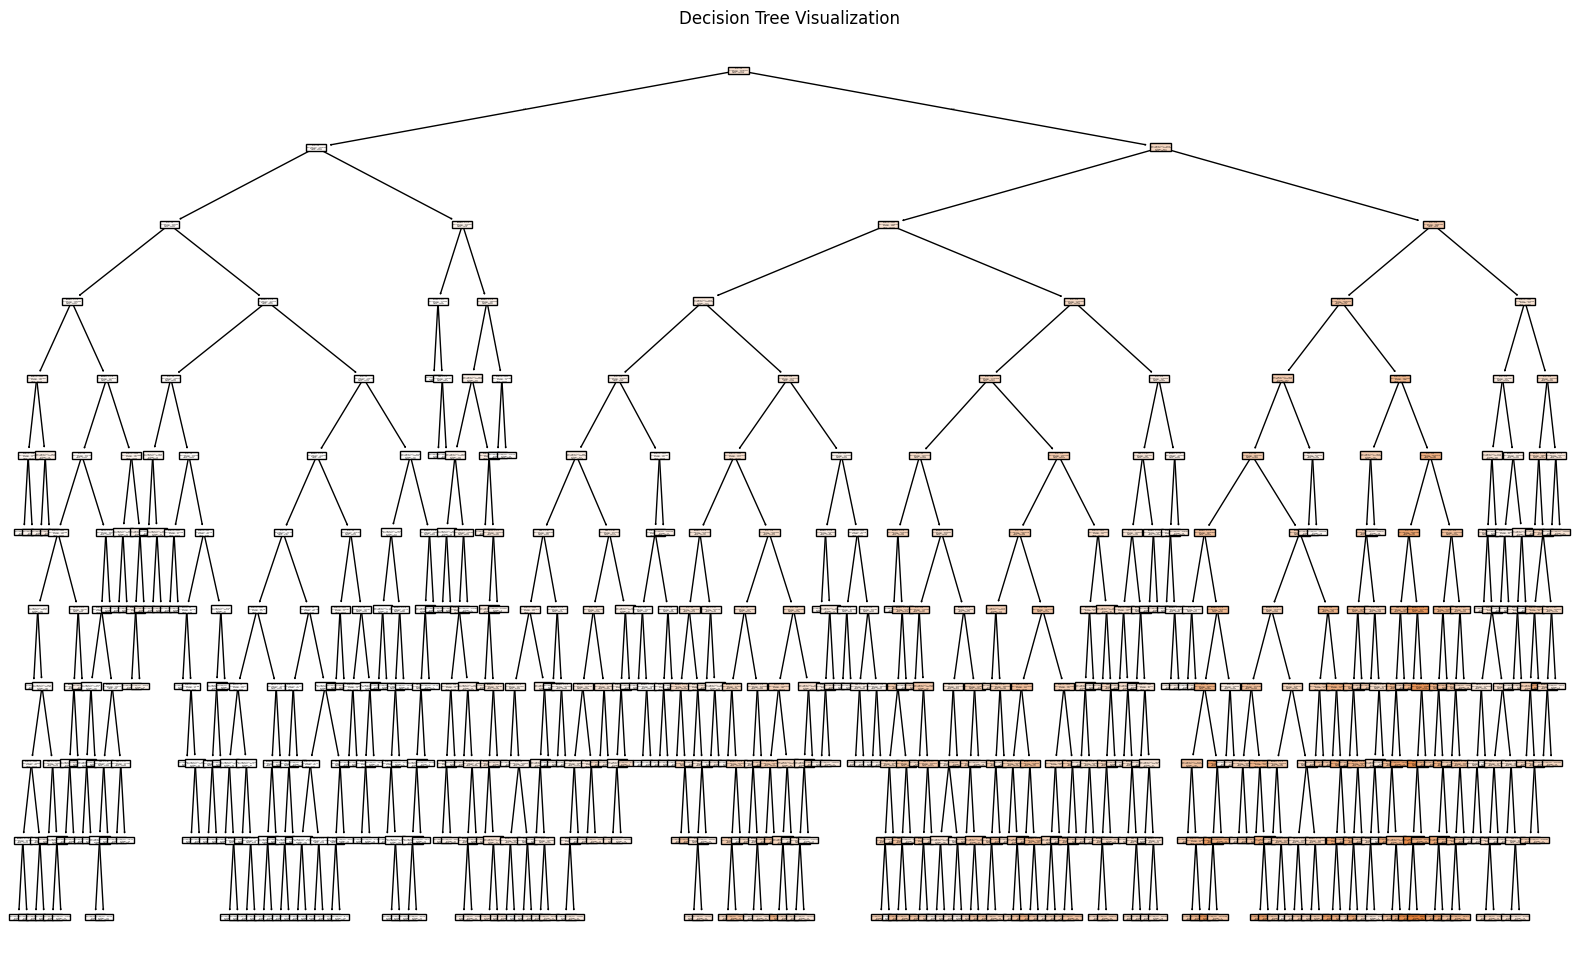

|--- hr <= 6.50
|   |--- hr <= 5.50
|   |   |--- hr <= 1.50
|   |   |   |--- weekday <= 0.50
|   |   |   |   |--- atemp <= 0.43
|   |   |   |   |   |--- atemp <= 0.28
|   |   |   |   |   |   |--- value: [36.88]
|   |   |   |   |   |--- atemp >  0.28
|   |   |   |   |   |   |--- value: [76.72]
|   |   |   |   |--- atemp >  0.43
|   |   |   |   |   |--- days_since_start <= 466.50
|   |   |   |   |   |   |--- value: [91.63]
|   |   |   |   |   |--- days_since_start >  466.50
|   |   |   |   |   |   |--- value: [130.92]
|   |   |   |--- weekday >  0.50
|   |   |   |   |--- weekday <= 5.50
|   |   |   |   |   |--- hr <= 0.50
|   |   |   |   |   |   |--- atemp <= 0.55
|   |   |   |   |   |   |   |--- days_since_start <= 103.50
|   |   |   |   |   |   |   |   |--- value: [12.23]
|   |   |   |   |   |   |   |--- days_since_start >  103.50
|   |   |   |   |   |   |   |   |--- days_since_start <= 480.50
|   |   |   |   |   |   |   |   |   |--- atemp <= 0.40
|   |   |   |   |   |   |   |   |   | 

In [133]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

# Split the data into training and testing sets
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42)

# Create and train the decision tree classifier - regression uses squared error
regressor = DecisionTreeRegressor(criterion="squared_error", max_depth=11, min_samples_split=50, random_state=42)  # You can use "entropy" for ID3

regressor.fit(X_train_tree, y_train_tree)

# Predict on the test set
y_pred_tree = regressor.predict(X_test_tree)

# Evaluate the model using R² score to understand the model’s explanatory power
r2_score = regressor.score(X_test_tree, y_test_tree)
print(f"R² Score: {r2_score:.2f}")

# Evaluate the model using mse to understand the error magnitude.
# root mse provides a measure in the same units as the target variable
rmse = root_mean_squared_error(y_test_tree, y_pred_tree)
print(f"RMSE: {rmse:.2f}")

# Visualize the tree
plt.figure(figsize=(20, 12))
plot_tree(regressor, feature_names=X_tree.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Print textual representation of the tree
tree_rules = export_text(regressor, feature_names=X_tree.columns)
print(tree_rules)

hr <= 6.5 is the split condition
value is predicted target value for that node (the mean of all target values in the node)

At leaf nodes, value represents the predicted output for any sample that lands there.
This is the actual prediction made by the regression tree.
Feature Importance: Nodes with big drops in value after splitting suggest that the feature is significant.

R² score of 0.49 means that 49% of the variance in the target variable (y) is explained by your regression model, while the remaining 51% is unexplained 